# Análisis Univariante: Tasa de Abandono

Este notebook realiza un análisis univariante exhaustivo de la tasa de abandono en programas académicos de la UPV.

**Objetivos:**
- Analizar la distribución de la tasa de abandono
- Evaluar características estadísticas
- Identificar patrones y anomalías
- Evaluar la calidad de los datos
- Comparar abandono vs permanencia

## 1. Librerías Requeridas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("✅ Librerías cargadas exitosamente")

✅ Librerías cargadas exitosamente


## 2. Cargar y Explorar Datos de Abandono

In [2]:
# Cargar el panel maestro
panel_maestro = pd.read_csv('../../data_extraction/panel_maestro_UPV.csv', encoding='utf-8')

print("📊 Información General del Dataset:")
print(f"  • Dimensiones: {panel_maestro.shape[0]} filas × {panel_maestro.shape[1]} columnas")
print(f"  • Peso: {panel_maestro.memory_usage(deep=True).sum() / 1024:.2f} KB")

print("\n📋 Columnas de Abandono:")
abandono_cols = ['tasa_abandono', 'tasa_permanencia']
for col in abandono_cols:
    print(f"  • {col}")

print("\n🔍 Primeras filas del dataset:")
display(panel_maestro[['CURSO', 'TITULACION', 'CENTRO', 'año'] + abandono_cols].head(10))

📊 Información General del Dataset:
  • Dimensiones: 483 filas × 16 columnas
  • Peso: 215.92 KB

📋 Columnas de Abandono:
  • tasa_abandono
  • tasa_permanencia

🔍 Primeras filas del dataset:


,CURSO,TITULACION,CENTRO,año,tasa_abandono,tasa_permanencia
0,2020-21,GRADO EN ARQUITECTURA TÉCNICA,E.T.S. DE INGENIERÍA DE EDIFICACIÓN,2020,36.36,63.64
1,2020-21,GRADO EN CIENCIAS AMBIENTALES,ESCUELA POLITECNICA SUPERIOR DE GANDIA,2020,12.50,87.50
2,2020-21,GRADO EN COMUNICACIÓN AUDIOVISUAL,ESCUELA POLITECNICA SUPERIOR DE GANDIA,2020,4.12,95.88
3,2020-21,GRADO EN TURISMO,ESCUELA POLITECNICA SUPERIOR DE GANDIA,2020,12.94,87.06
4,2020-21,GRADO EN INGENIERÍA EN DISEÑO INDUSTRIAL Y DES...,E. POLITÉCNICA SUPERIOR DE ALCOY,2020,10.71,89.29
5,2020-21,GRADO EN INGENIERÍA EN DISEÑO INDUSTRIAL Y DES...,E.T.S. DE INGENIERIA DEL DISEÑO,2020,1.42,98.58
6,2020-21,GRADO EN BELLAS ARTES,FACULTAD DE BELLAS ARTES,2020,7.55,92.45
7,2020-21,GRADO EN CONSERVACIÓN Y RESTAURACIÓN DE BIENES...,FACULTAD DE BELLAS ARTES,2020,8.33,91.67
8,2020-21,GRADO EN GESTIÓN Y ADMINISTRACIÓN PÚBLICA,FACULTAD DE ADMINISTRACIÓN Y DIRECCIÓN DE EMPR...,2020,23.68,76.32
9,2020-21,GRADO EN BIOTECNOLOGÍA,E.T.S.I. AGRONÓMICA Y DEL MEDIO NATURAL,2020,8.70,91.30


In [3]:
# Seleccionar solo las columnas numéricas de abandono
abandono_numeric_cols = ['tasa_abandono', 'tasa_permanencia']
abandono_data = panel_maestro[abandono_numeric_cols].copy()

print("📊 Información de Tipos de Datos:")
print(abandono_data.dtypes)

print("\n📈 Información General:")
abandono_data.info()

📊 Información de Tipos de Datos:
tasa_abandono       float64
tasa_permanencia    float64
dtype: object

📈 Información General:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tasa_abandono     455 non-null    float64
 1   tasa_permanencia  455 non-null    float64
dtypes: float64(2)
memory usage: 7.7 KB


## 3. Estadísticas Descriptivas

In [4]:
print("📊 ESTADÍSTICAS DESCRIPTIVAS COMPLETAS\n")
print("="*100)

for col in abandono_numeric_cols:
    print(f"\n🔹 {col.upper()}")
    print("-" * 100)
    
    data = panel_maestro[col].dropna()
    
    print(f"  Observaciones válidas: {len(data)}/{len(panel_maestro)} ({100*len(data)/len(panel_maestro):.2f}%)")
    print(f"  Valores faltantes: {panel_maestro[col].isna().sum()} ({100*panel_maestro[col].isna().sum()/len(panel_maestro):.2f}%)")
    print(f"\n  Medidas de Tendencia Central:")
    print(f"    • Media: {data.mean():.4f}")
    print(f"    • Mediana: {data.median():.4f}")
    print(f"    • Moda: {data.mode().values[0] if len(data.mode()) > 0 else 'N/A':.4f}")
    
    print(f"\n  Medidas de Dispersión:")
    print(f"    • Desviación Estándar: {data.std():.4f}")
    print(f"    • Varianza: {data.var():.4f}")
    print(f"    • Rango: {data.max() - data.min():.4f}")
    print(f"    • Rango Intercuartílico (IQR): {data.quantile(0.75) - data.quantile(0.25):.4f}")
    
    print(f"\n  Cuartiles:")
    print(f"    • Q1 (25%): {data.quantile(0.25):.4f}")
    print(f"    • Q2 (50%): {data.quantile(0.50):.4f}")
    print(f"    • Q3 (75%): {data.quantile(0.75):.4f}")
    print(f"    • Q4 (100%): {data.max():.4f}")
    
    print(f"\n  Extremos:")
    print(f"    • Mínimo: {data.min():.4f}")
    print(f"    • Máximo: {data.max():.4f}")
    print(f"    • Percentil 5: {data.quantile(0.05):.4f}")
    print(f"    • Percentil 95: {data.quantile(0.95):.4f}")

print("\n" + "="*100)

📊 ESTADÍSTICAS DESCRIPTIVAS COMPLETAS


🔹 TASA_ABANDONO
----------------------------------------------------------------------------------------------------
  Observaciones válidas: 455/483 (94.20%)
  Valores faltantes: 28 (5.80%)

  Medidas de Tendencia Central:
    • Media: 14.7107
    • Mediana: 11.7600
    • Moda: 0.0000

  Medidas de Dispersión:
    • Desviación Estándar: 11.8414
    • Varianza: 140.2197
    • Rango: 100.0000
    • Rango Intercuartílico (IQR): 12.6200

  Cuartiles:
    • Q1 (25%): 6.6700
    • Q2 (50%): 11.7600
    • Q3 (75%): 19.2900
    • Q4 (100%): 100.0000

  Extremos:
    • Mínimo: 0.0000
    • Máximo: 100.0000
    • Percentil 5: 0.0000
    • Percentil 95: 36.5340

🔹 TASA_PERMANENCIA
----------------------------------------------------------------------------------------------------
  Observaciones válidas: 455/483 (94.20%)
  Valores faltantes: 28 (5.80%)

  Medidas de Tendencia Central:
    • Media: 85.2893
    • Mediana: 88.2400
    • Moda: 100.0000

  Medi

In [5]:
# Tabla resumen con describe
print("\n📊 Resumen Estadístico (Pandas describe):")
print(abandono_data.describe().T)


📊 Resumen Estadístico (Pandas describe):
                  count       mean        std  min    25%    50%    75%    max
tasa_abandono     455.0  14.710703  11.841438  0.0   6.67  11.76  19.29  100.0
tasa_permanencia  455.0  85.289297  11.841438  0.0  80.71  88.24  93.33  100.0


## 4. Análisis de Distribución

In [6]:
print("📊 ANÁLISIS DE DISTRIBUCIÓN\n")
print("="*100)

for col in abandono_numeric_cols:
    print(f"\n🔹 {col.upper()}")
    print("-" * 100)
    
    data = panel_maestro[col].dropna()
    
    # Sesgo y Curtosis
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    
    print(f"  Asimetría (Skewness): {skewness:.4f}")
    if abs(skewness) < 0.5:
        print(f"    ➜ Distribución aproximadamente simétrica")
    elif skewness > 0:
        print(f"    ➜ Distribución sesgada a la DERECHA (cola derecha larga)")
    else:
        print(f"    ➜ Distribución sesgada a la IZQUIERDA (cola izquierda larga)")
    
    print(f"\n  Curtosis (Kurtosis): {kurtosis:.4f}")
    if abs(kurtosis) < 0.5:
        print(f"    ➜ Curtosis normal (mesocúrtica)")
    elif kurtosis > 0:
        print(f"    ➜ Distribución leptocúrtica (colas pesadas, picos altos)")
    else:
        print(f"    ➜ Distribución platicúrtica (colas ligeras, picos bajos)")
    
    # Test de normalidad (Shapiro-Wilk)
    if len(data) <= 5000:
        stat_shapiro, p_shapiro = stats.shapiro(data)
        print(f"\n  Test de Normalidad (Shapiro-Wilk):")
        print(f"    • Estadístico: {stat_shapiro:.4f}")
        print(f"    • p-valor: {p_shapiro:.6f}")
        if p_shapiro < 0.05:
            print(f"    ➜ ❌ Los datos NO siguen una distribución normal (p < 0.05)")
        else:
            print(f"    ➜ ✅ Los datos SÍ siguen una distribución normal (p ≥ 0.05)")
    
    # Test de Kolmogorov-Smirnov
    stat_ks, p_ks = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"\n  Test de Kolmogorov-Smirnov:")
    print(f"    • Estadístico: {stat_ks:.4f}")
    print(f"    • p-valor: {p_ks:.6f}")
    if p_ks < 0.05:
        print(f"    ➜ ❌ Distribución rechazada como normal (p < 0.05)")
    else:
        print(f"    ➜ ✅ Distribución consistente con distribución normal (p ≥ 0.05)")

print("\n" + "="*100)

📊 ANÁLISIS DE DISTRIBUCIÓN


🔹 TASA_ABANDONO
----------------------------------------------------------------------------------------------------
  Asimetría (Skewness): 1.9701
    ➜ Distribución sesgada a la DERECHA (cola derecha larga)

  Curtosis (Kurtosis): 7.6747
    ➜ Distribución leptocúrtica (colas pesadas, picos altos)

  Test de Normalidad (Shapiro-Wilk):
    • Estadístico: 0.8614
    • p-valor: 0.000000
    ➜ ❌ Los datos NO siguen una distribución normal (p < 0.05)

  Test de Kolmogorov-Smirnov:
    • Estadístico: 0.1156
    • p-valor: 0.000009
    ➜ ❌ Distribución rechazada como normal (p < 0.05)

🔹 TASA_PERMANENCIA
----------------------------------------------------------------------------------------------------
  Asimetría (Skewness): -1.9701
    ➜ Distribución sesgada a la IZQUIERDA (cola izquierda larga)

  Curtosis (Kurtosis): 7.6747
    ➜ Distribución leptocúrtica (colas pesadas, picos altos)

  Test de Normalidad (Shapiro-Wilk):
    • Estadístico: 0.8614
    • p-va

## 5. Visualización de Métricas de Abandono

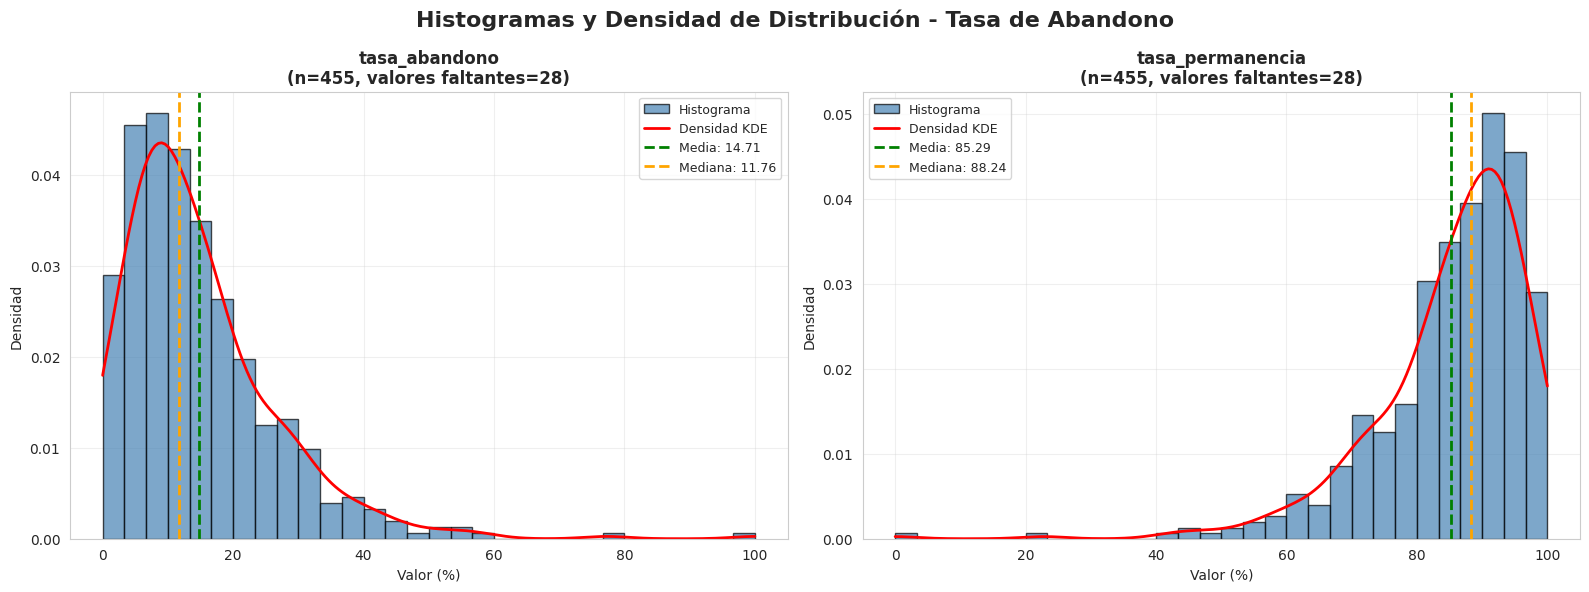

✅ Gráfico guardado: 01_histogramas_densidad_tasa_abandono.png


In [7]:
# Histogramas y Curvas de Densidad
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Histogramas y Densidad de Distribución - Tasa de Abandono', fontsize=16, fontweight='bold')

for idx, col in enumerate(abandono_numeric_cols):
    ax = axes[idx]
    data = panel_maestro[col].dropna()
    
    # Histograma
    ax.hist(data, bins=30, alpha=0.7, color='steelblue', edgecolor='black', density=True, label='Histograma')
    
    # Curva de densidad
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 200)
    ax.plot(x_range, kde(x_range), 'r-', linewidth=2, label='Densidad KDE')
    
    # Línea de media
    ax.axvline(data.mean(), color='green', linestyle='--', linewidth=2, label=f'Media: {data.mean():.2f}')
    ax.axvline(data.median(), color='orange', linestyle='--', linewidth=2, label=f'Mediana: {data.median():.2f}')
    
    ax.set_title(f'{col}\n(n={len(data)}, valores faltantes={panel_maestro[col].isna().sum()})', fontsize=12, fontweight='bold')
    ax.set_xlabel('Valor (%)', fontsize=10)
    ax.set_ylabel('Densidad', fontsize=10)
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('01_histogramas_densidad_tasa_abandono.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 01_histogramas_densidad_tasa_abandono.png")

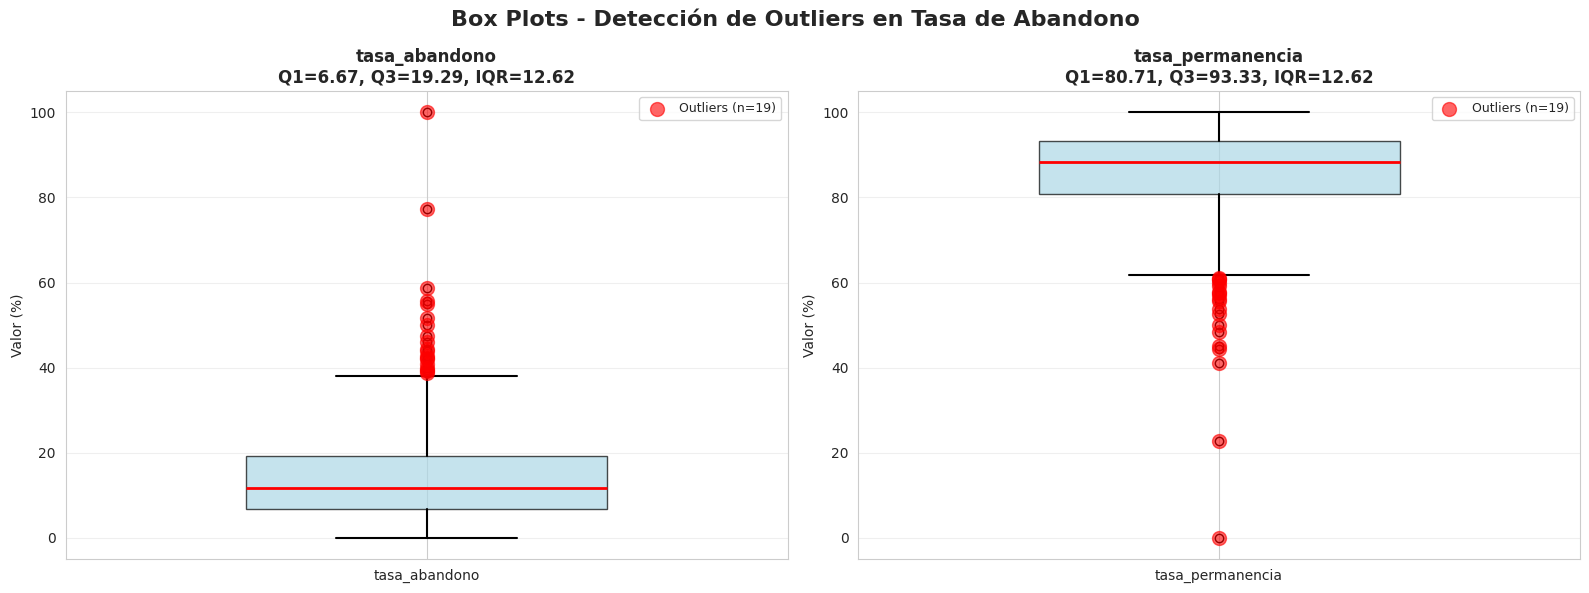

✅ Gráfico guardado: 02_boxplots_tasa_abandono.png


In [8]:
# Box Plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Box Plots - Detección de Outliers en Tasa de Abandono', fontsize=16, fontweight='bold')

for idx, col in enumerate(abandono_numeric_cols):
    ax = axes[idx]
    data = panel_maestro[col].dropna()
    
    bp = ax.boxplot(data, vert=True, patch_artist=True, widths=0.5,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2),
                    whiskerprops=dict(color='black', linewidth=1.5),
                    capprops=dict(color='black', linewidth=1.5))
    
    # Calcular IQR y outliers
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    # Mostrar outliers
    ax.scatter([1]*len(outliers), outliers, color='red', s=100, zorder=3, alpha=0.6, label=f'Outliers (n={len(outliers)})')
    
    ax.set_title(f'{col}\nQ1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Valor (%)', fontsize=10)
    ax.set_xticklabels([col])
    ax.grid(True, alpha=0.3, axis='y')
    ax.legend(fontsize=9)

plt.tight_layout()
plt.savefig('02_boxplots_tasa_abandono.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 02_boxplots_tasa_abandono.png")

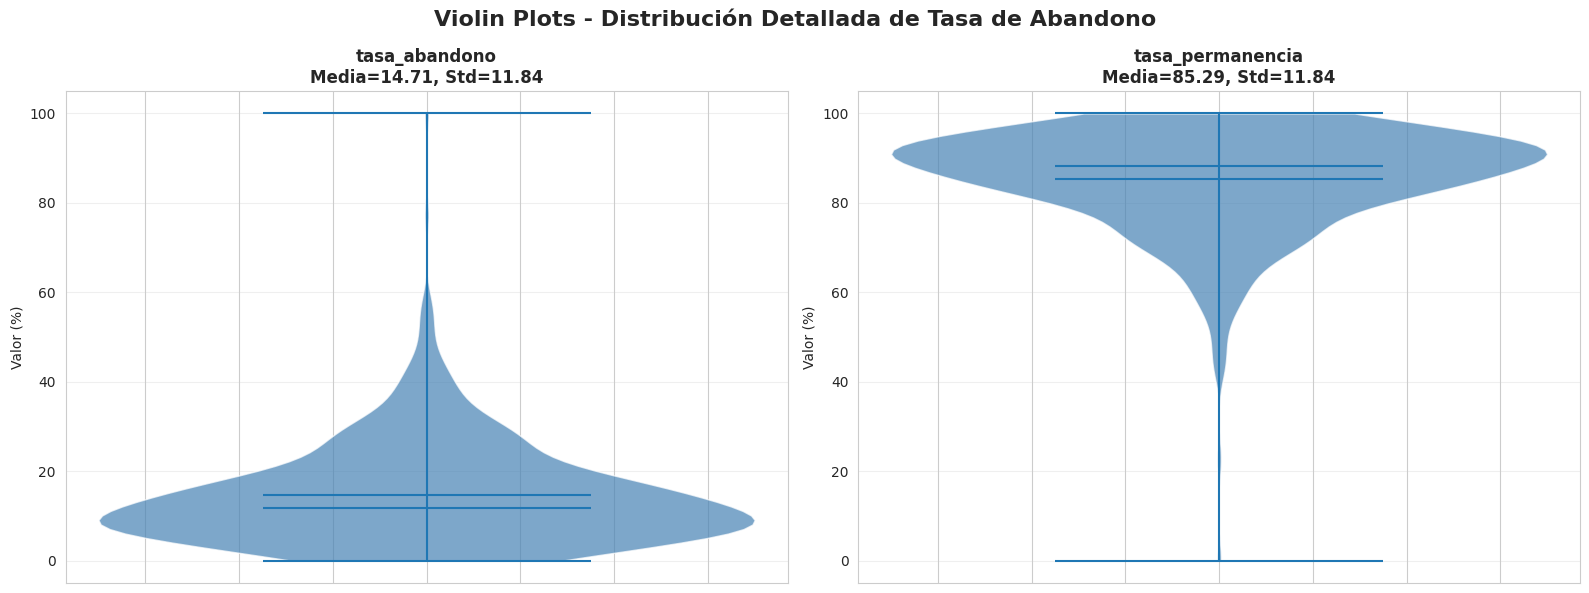

✅ Gráfico guardado: 03_violinplots_tasa_abandono.png


In [9]:
# Violin Plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Violin Plots - Distribución Detallada de Tasa de Abandono', fontsize=16, fontweight='bold')

for idx, col in enumerate(abandono_numeric_cols):
    ax = axes[idx]
    data = panel_maestro[col].dropna()
    
    parts = ax.violinplot([data], positions=[1], widths=0.7, showmeans=True, showmedians=True)
    
    for pc in parts['bodies']:
        pc.set_facecolor('steelblue')
        pc.set_alpha(0.7)
    
    ax.set_title(f'{col}\nMedia={data.mean():.2f}, Std={data.std():.2f}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Valor (%)', fontsize=10)
    ax.set_xticklabels([col])
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('03_violinplots_tasa_abandono.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 03_violinplots_tasa_abandono.png")

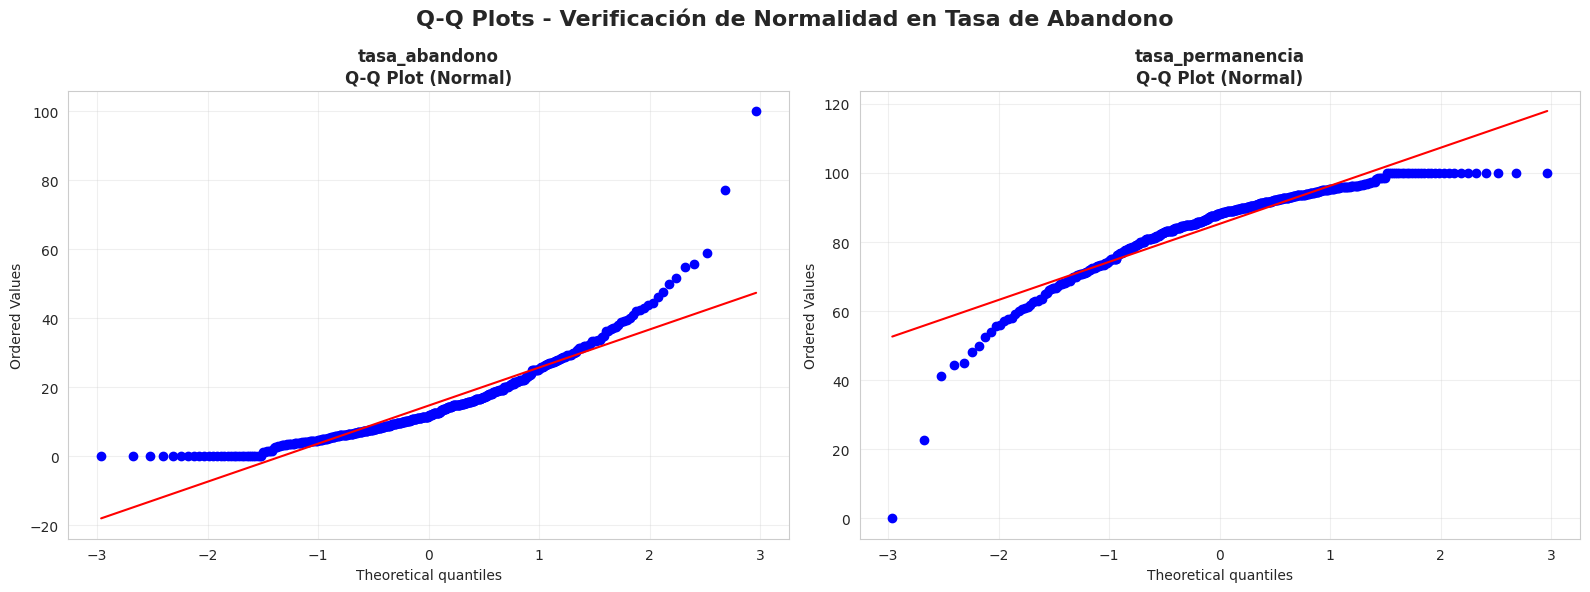

✅ Gráfico guardado: 04_qqplots_tasa_abandono.png


In [10]:
# Q-Q Plots para verificar normalidad
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Q-Q Plots - Verificación de Normalidad en Tasa de Abandono', fontsize=16, fontweight='bold')

for idx, col in enumerate(abandono_numeric_cols):
    ax = axes[idx]
    data = panel_maestro[col].dropna()
    
    stats.probplot(data, dist="norm", plot=ax)
    ax.set_title(f'{col}\nQ-Q Plot (Normal)', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('04_qqplots_tasa_abandono.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 04_qqplots_tasa_abandono.png")

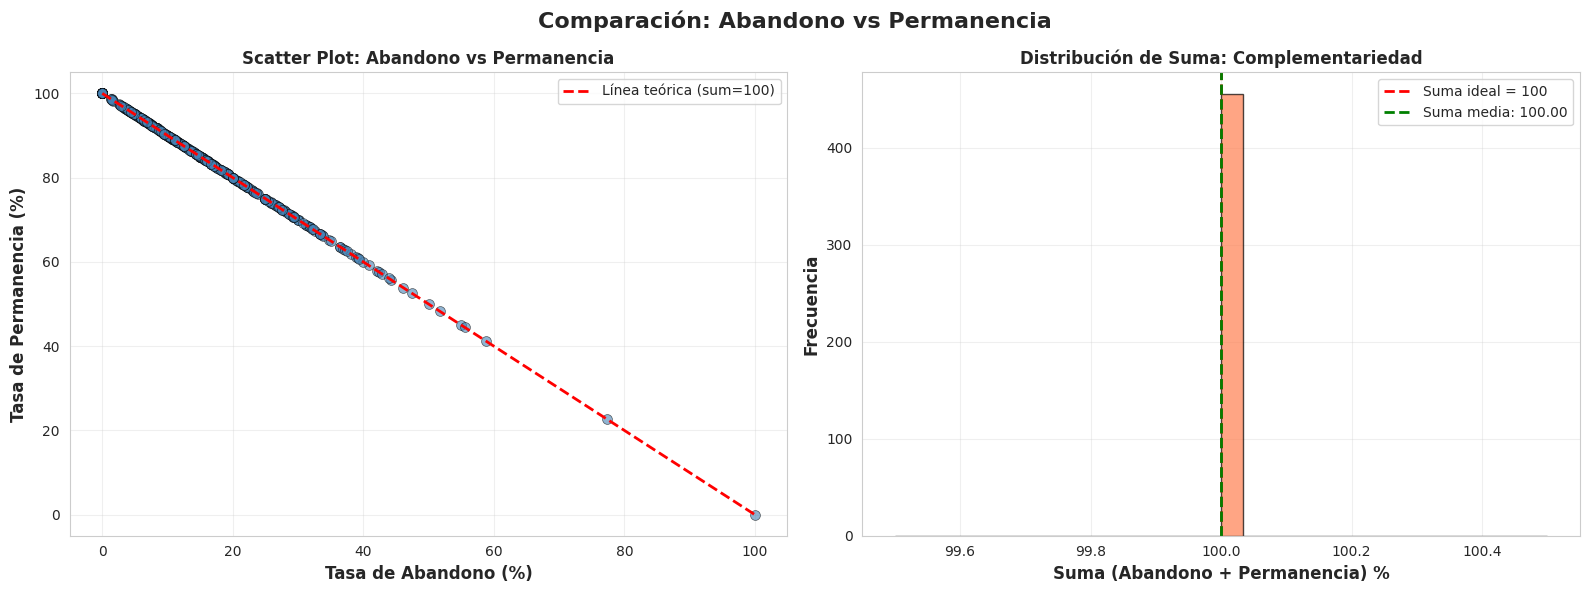

✅ Gráfico guardado: 05_comparacion_abandono_permanencia.png


In [11]:
# Comparación: Abandono vs Permanencia
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Comparación: Abandono vs Permanencia', fontsize=16, fontweight='bold')

# Scatter plot
ax1 = axes[0]
valid_data = panel_maestro[['tasa_abandono', 'tasa_permanencia']].dropna()
ax1.scatter(valid_data['tasa_abandono'], valid_data['tasa_permanencia'], 
           alpha=0.6, s=50, color='steelblue', edgecolor='black', linewidth=0.5)
ax1.plot([0, 100], [100, 0], 'r--', linewidth=2, label='Línea teórica (sum=100)')
ax1.set_xlabel('Tasa de Abandono (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Tasa de Permanencia (%)', fontsize=12, fontweight='bold')
ax1.set_title('Scatter Plot: Abandono vs Permanencia', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)
ax1.set_xlim(-5, 105)
ax1.set_ylim(-5, 105)

# Distribución de suma
ax2 = axes[1]
total_sum = valid_data['tasa_abandono'] + valid_data['tasa_permanencia']
ax2.hist(total_sum, bins=30, alpha=0.7, color='coral', edgecolor='black')
ax2.axvline(100, color='red', linestyle='--', linewidth=2, label='Suma ideal = 100')
mean_sum = total_sum.mean()
ax2.axvline(mean_sum, color='green', linestyle='--', linewidth=2, label=f'Suma media: {mean_sum:.2f}')
ax2.set_xlabel('Suma (Abandono + Permanencia) %', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
ax2.set_title('Distribución de Suma: Complementariedad', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)

plt.tight_layout()
plt.savefig('05_comparacion_abandono_permanencia.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 05_comparacion_abandono_permanencia.png")

In [12]:
# Análisis por categorías (años disponibles)
print("📊 ANÁLISIS DE TASA_ABANDONO POR AÑO\n")
print("="*100)

# Agrupar por año
abandono_por_año = panel_maestro.groupby('año')['tasa_abandono'].agg(['count', 'mean', 'std', 'min', 'max'])
print("\nEstadísticas por Año Académico:")
print(abandono_por_año)

print("\n" + "="*100)

📊 ANÁLISIS DE TASA_ABANDONO POR AÑO


Estadísticas por Año Académico:
      count       mean        std  min     max
año                                           
2020    105  12.788095   9.310543  0.0   42.11
2021    113  15.687522  10.482740  0.0   47.50
2022    116  14.519914  11.813281  0.0   58.82
2023    121  15.649752  14.629134  0.0  100.00



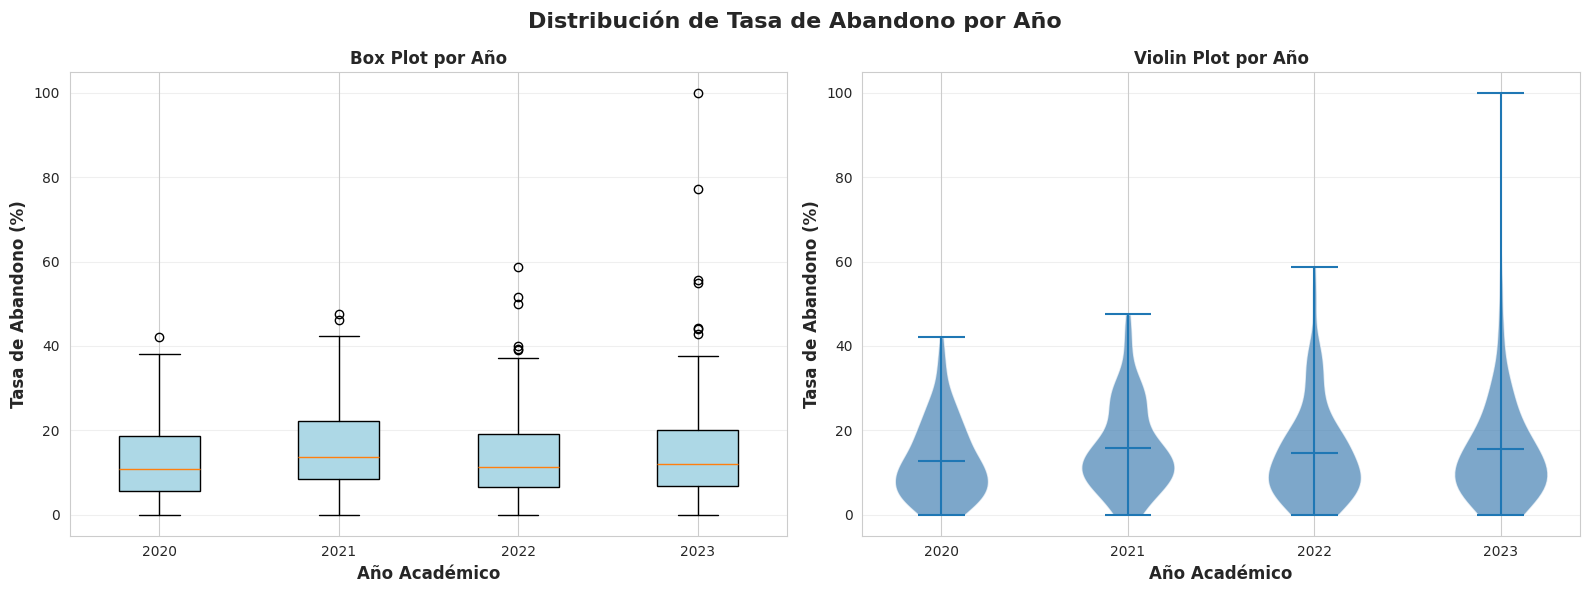

✅ Gráfico guardado: 06_distribucion_abandono_por_categoria.png


In [13]:
# Gráficos por categoría
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribución de Tasa de Abandono por Año', fontsize=16, fontweight='bold')

# Box plot por año
ax1 = axes[0]
years = sorted(panel_maestro['año'].unique())
data_by_year = [panel_maestro[panel_maestro['año'] == y]['tasa_abandono'].dropna() for y in years]
bp = ax1.boxplot(data_by_year, labels=years, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
ax1.set_xlabel('Año Académico', fontsize=12, fontweight='bold')
ax1.set_ylabel('Tasa de Abandono (%)', fontsize=12, fontweight='bold')
ax1.set_title('Box Plot por Año', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Violin plot por año
ax2 = axes[1]
parts = ax2.violinplot(data_by_year, positions=range(len(years)), showmeans=True)
for pc in parts['bodies']:
    pc.set_facecolor('steelblue')
    pc.set_alpha(0.7)
ax2.set_xticks(range(len(years)))
ax2.set_xticklabels(years)
ax2.set_xlabel('Año Académico', fontsize=12, fontweight='bold')
ax2.set_ylabel('Tasa de Abandono (%)', fontsize=12, fontweight='bold')
ax2.set_title('Violin Plot por Año', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('06_distribucion_abandono_por_categoria.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 06_distribucion_abandono_por_categoria.png")

## 6. Detección de Outliers

In [14]:
print("🔍 ANÁLISIS DE OUTLIERS\n")
print("="*100)

for col in abandono_numeric_cols:
    print(f"\n🔹 {col.upper()}")
    print("-" * 100)
    
    data = panel_maestro[col].dropna()
    
    # Método IQR (Interquartile Range)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound_iqr = Q1 - 1.5 * IQR
    upper_bound_iqr = Q3 + 1.5 * IQR
    
    outliers_iqr = data[(data < lower_bound_iqr) | (data > upper_bound_iqr)]
    
    print(f"  Método IQR (Rango Intercuartílico):")
    print(f"    • Q1 = {Q1:.4f}, Q3 = {Q3:.4f}, IQR = {IQR:.4f}")
    print(f"    • Límite inferior: {lower_bound_iqr:.4f}")
    print(f"    • Límite superior: {upper_bound_iqr:.4f}")
    print(f"    • Outliers detectados: {len(outliers_iqr)} ({100*len(outliers_iqr)/len(data):.2f}%)")
    
    if len(outliers_iqr) > 0:
        print(f"    • Valores de outliers: {sorted(outliers_iqr.values)}")
    
    # Método Z-score
    z_scores = np.abs(stats.zscore(data))
    outliers_z = data[z_scores > 3]
    
    print(f"\n  Método Z-score (|Z| > 3):")
    print(f"    • Outliers detectados: {len(outliers_z)} ({100*len(outliers_z)/len(data):.2f}%)")
    
    if len(outliers_z) > 0:
        print(f"    • Valores de outliers: {sorted(outliers_z.values)}")
    
    # Método Isolation Forest
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    outliers_if = iso_forest.fit_predict(data.values.reshape(-1, 1)) == -1
    
    print(f"\n  Método Isolation Forest:")
    print(f"    • Outliers detectados: {outliers_if.sum()} ({100*outliers_if.sum()/len(data):.2f}%)")

print("\n" + "="*100)

🔍 ANÁLISIS DE OUTLIERS


🔹 TASA_ABANDONO
----------------------------------------------------------------------------------------------------
  Método IQR (Rango Intercuartílico):
    • Q1 = 6.6700, Q3 = 19.2900, IQR = 12.6200
    • Límite inferior: -12.2600
    • Límite superior: 38.2200
    • Outliers detectados: 19 (4.18%)
    • Valores de outliers: [np.float64(38.81), np.float64(39.13), np.float64(39.39), np.float64(40.0), np.float64(40.82), np.float64(42.11), np.float64(42.35), np.float64(42.86), np.float64(43.94), np.float64(44.3), np.float64(46.15), np.float64(47.5), np.float64(50.0), np.float64(51.72), np.float64(54.9), np.float64(55.56), np.float64(58.82), np.float64(77.27), np.float64(100.0)]

  Método Z-score (|Z| > 3):
    • Outliers detectados: 6 (1.32%)
    • Valores de outliers: [np.float64(51.72), np.float64(54.9), np.float64(55.56), np.float64(58.82), np.float64(77.27), np.float64(100.0)]

  Método Isolation Forest:
    • Outliers detectados: 23 (5.05%)

🔹 TASA_PERMANE

## 7. Evaluación de Calidad de Datos

In [15]:
print("📋 EVALUACIÓN DE CALIDAD DE DATOS\n")
print("="*100)

print("\n🔍 VALORES FALTANTES:")
print("-" * 100)
missing_summary = pd.DataFrame({
    'Variable': abandono_numeric_cols,
    'Faltantes': [panel_maestro[col].isna().sum() for col in abandono_numeric_cols],
    'Porcentaje': [f"{100*panel_maestro[col].isna().sum()/len(panel_maestro):.2f}%" for col in abandono_numeric_cols],
    'Válidos': [panel_maestro[col].notna().sum() for col in abandono_numeric_cols]
})
print(missing_summary.to_string(index=False))

print("\n\n🔍 DUPLICADOS:")
print("-" * 100)
# Buscar filas completamente duplicadas
completely_duplicated = panel_maestro[abandono_numeric_cols].duplicated(keep=False).sum()
print(f"  • Filas completamente duplicadas en abandono: {completely_duplicated}")

# Buscar duplicados parciales
for col in abandono_numeric_cols:
    duplicated_count = panel_maestro[col].duplicated(keep=False).sum()
    print(f"  • Valores duplicados en {col}: {duplicated_count}")

print("\n\n🔍 CONSISTENCIA DE DATOS:")
print("-" * 100)
# Verificar que abandono + permanencia = 100
valid_data_consistency = panel_maestro[['tasa_abandono', 'tasa_permanencia']].dropna()
total_pct = valid_data_consistency['tasa_abandono'] + valid_data_consistency['tasa_permanencia']
consistency_check = np.isclose(total_pct, 100, atol=0.1)
print(f"  • Registros consistentes (abandono + permanencia ≈ 100): {consistency_check.sum()}/{len(consistency_check)}")
print(f"  • Registros inconsistentes: {(~consistency_check).sum()}")
print(f"  • Suma mínima: {total_pct.min():.2f}%")
print(f"  • Suma máxima: {total_pct.max():.2f}%")
print(f"  • Suma media: {total_pct.mean():.2f}%")

print("\n\n🔍 RANGO DE VALORES:")
print("-" * 100)
for col in abandono_numeric_cols:
    data = panel_maestro[col].dropna()
    print(f"  • {col}:")
    print(f"    - Mínimo: {data.min():.4f}% (esperado: >= 0)")
    print(f"    - Máximo: {data.max():.4f}% (esperado: <= 100)")
    out_of_range = ((data < 0) | (data > 100)).sum()
    print(f"    - Valores fuera de rango [0-100]: {out_of_range}")

print("\n" + "="*100)

📋 EVALUACIÓN DE CALIDAD DE DATOS


🔍 VALORES FALTANTES:
----------------------------------------------------------------------------------------------------
        Variable  Faltantes Porcentaje  Válidos
   tasa_abandono         28      5.80%      455
tasa_permanencia         28      5.80%      455


🔍 DUPLICADOS:
----------------------------------------------------------------------------------------------------
  • Filas completamente duplicadas en abandono: 293
  • Valores duplicados en tasa_abandono: 293
  • Valores duplicados en tasa_permanencia: 293


🔍 CONSISTENCIA DE DATOS:
----------------------------------------------------------------------------------------------------
  • Registros consistentes (abandono + permanencia ≈ 100): 455/455
  • Registros inconsistentes: 0
  • Suma mínima: 100.00%
  • Suma máxima: 100.00%
  • Suma media: 100.00%


🔍 RANGO DE VALORES:
----------------------------------------------------------------------------------------------------
  • tasa_aban

## 8. Resumen Ejecutivo

In [16]:
print("\n" + "="*100)
print("📊 RESUMEN EJECUTIVO - ANÁLISIS UNIVARIANTE DE TASA DE ABANDONO")
print("="*100)

print("\n🎯 HALLAZGOS PRINCIPALES:\n")

# 1. Nivel general de abandono
print("1️⃣ NIVEL GENERAL DE ABANDONO:")
tasa_abandono_media = panel_maestro['tasa_abandono'].mean()
tasa_permanencia_media = panel_maestro['tasa_permanencia'].mean()
print(f"   • Tasa de abandono media: {tasa_abandono_media:.2f}%")
print(f"   • Tasa de permanencia media: {tasa_permanencia_media:.2f}%")
print(f"   ➜ La tasa de abandono promedio es {'ALTA' if tasa_abandono_media > 25 else 'MEDIA' if tasa_abandono_media > 10 else 'BAJA'} ({tasa_abandono_media:.2f}%)")

# 2. Distribución
print("\n2️⃣ CARACTERÍSTICAS DE DISTRIBUCIÓN:")
for col in abandono_numeric_cols:
    data = panel_maestro[col].dropna()
    skewness = stats.skew(data)
    print(f"   • {col}:")
    print(f"     - Asimetría: {skewness:.4f} {'(izquierda)' if skewness < -0.5 else '(centro)' if abs(skewness) < 0.5 else '(derecha)'}")
    print(f"     - Desv. Estándar: {data.std():.4f}%")
    print(f"     - Variación: {'Alta' if data.std() > 20 else 'Media' if data.std() > 10 else 'Baja'}")

# 3. Calidad de datos
print("\n3️⃣ CALIDAD DE DATOS:")
missing_pct_abandono = 100*panel_maestro['tasa_abandono'].isna().sum()/len(panel_maestro)
print(f"   • Valores faltantes - Tasa de Abandono: {missing_pct_abandono:.2f}%")
print(f"   • Integridad: ✅ ACEPTABLE" if missing_pct_abandono < 5 else "   • Integridad: ⚠️ REVISAR" if missing_pct_abandono < 10 else "   • Integridad: ❌ CRÍTICA")

# 4. Outliers
print("\n4️⃣ OUTLIERS:")
Q1_abandono = panel_maestro['tasa_abandono'].quantile(0.25)
Q3_abandono = panel_maestro['tasa_abandono'].quantile(0.75)
IQR_abandono = Q3_abandono - Q1_abandono
outliers_abandono = panel_maestro['tasa_abandono'][
    (panel_maestro['tasa_abandono'] < Q1_abandono - 1.5*IQR_abandono) | 
    (panel_maestro['tasa_abandono'] > Q3_abandono + 1.5*IQR_abandono)
]
pct_outliers = 100*len(outliers_abandono)/panel_maestro['tasa_abandono'].notna().sum()
print(f"   • Outliers en tasa_abandono: {len(outliers_abandono)} ({pct_outliers:.2f}%)")
print(f"   • Implicación: {'Varios' if pct_outliers > 10 else 'Algunos' if pct_outliers > 5 else 'Pocos'} programas tienen tasa de abandono significativamente diferente")

# 5. Normalidad
print("\n5️⃣ NORMALIDAD DE DISTRIBUCIÓN:")
data_abandono = panel_maestro['tasa_abandono'].dropna()
stat_shapiro, p_shapiro = stats.shapiro(data_abandono)
print(f"   • Test Shapiro-Wilk (tasa_abandono): p-valor = {p_shapiro:.6f}")
print(f"   • Conclusión: {'❌ NO normal' if p_shapiro < 0.05 else '✅ Normal'} (p < 0.05)")
print(f"   • Implicación: Se recomienda usar métodos {'no-paramétricos' if p_shapiro < 0.05 else 'paramétricos'} para inferencia")

print("\n" + "="*100)
print("✅ ANÁLISIS COMPLETADO")
print("="*100)


📊 RESUMEN EJECUTIVO - ANÁLISIS UNIVARIANTE DE TASA DE ABANDONO

🎯 HALLAZGOS PRINCIPALES:

1️⃣ NIVEL GENERAL DE ABANDONO:
   • Tasa de abandono media: 14.71%
   • Tasa de permanencia media: 85.29%
   ➜ La tasa de abandono promedio es MEDIA (14.71%)

2️⃣ CARACTERÍSTICAS DE DISTRIBUCIÓN:
   • tasa_abandono:
     - Asimetría: 1.9701 (derecha)
     - Desv. Estándar: 11.8414%
     - Variación: Media
   • tasa_permanencia:
     - Asimetría: -1.9701 (izquierda)
     - Desv. Estándar: 11.8414%
     - Variación: Media

3️⃣ CALIDAD DE DATOS:
   • Valores faltantes - Tasa de Abandono: 5.80%
   • Integridad: ⚠️ REVISAR

4️⃣ OUTLIERS:
   • Outliers en tasa_abandono: 19 (4.18%)
   • Implicación: Pocos programas tienen tasa de abandono significativamente diferente

5️⃣ NORMALIDAD DE DISTRIBUCIÓN:
   • Test Shapiro-Wilk (tasa_abandono): p-valor = 0.000000
   • Conclusión: ❌ NO normal (p < 0.05)
   • Implicación: Se recomienda usar métodos no-paramétricos para inferencia

✅ ANÁLISIS COMPLETADO
